## Loading Files

In [3]:
# Code to download file into Colaboratory:
!pip install -U -q PyDrive
!pip install google-colab

from google.colab import drive
drive.mount('/content/gdrive')
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


##### Load News_Yahoo_stock.csv data

# id = '1l8rFaYOf78BHHsw8zgvLICEwkRd9pdu_'
# downloaded = drive.CreateFile({'id':id})
# downloaded.GetContentFile('News_Yahoo_stock.csv')  

import pandas as pd
# data = pd.read_csv("/content/News_Yahoo_stock.csv")


##### Load stock_data.csv data

id = '1gTxNDkMTK_Rky8lz2n8TUGmixAX_A6Nm'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('stock_data.csv')  
data = pd.read_csv("/content/stock_data.csv")


##### Load Raw data
# https://drive.google.com/file/d/1y_RO3uvQJs8hCTW8WvCIJbBhONIw-sHy/view?usp=sharing
id = '1y_RO3uvQJs8hCTW8WvCIJbBhONIw-sHy'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('NWSA.csv')  
NWSAdata = pd.read_csv("/content/NWSA.csv") 

# https://drive.google.com/file/d/1F0WPuYbQBeUFB6DnljD2o81TmIdpj8tH/view?usp=sharing
id = '1F0WPuYbQBeUFB6DnljD2o81TmIdpj8tH'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('BAC.csv')  
BACdata = pd.read_csv("/content/BAC.csv") 

# https://drive.google.com/file/d/1l8vT8JRDAN-I_NlDPqbCdbLDdiIhZlef/view?usp=sharing
id = '1l8vT8JRDAN-I_NlDPqbCdbLDdiIhZlef'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('MSFT.csv')  
MSFTdata = pd.read_csv("/content/MSFT.csv") 

##### Laod the " cleanedalldataset1.csv" from week4
id = '1BMsv613EZLQLs28RdU19O0lKx98tvFAq'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('cleanedalldataset1.csv')  
cleaned_all_data = pd.read_csv("/content/cleanedalldataset1.csv") 

##### 1700 rows BAC data
# https://drive.google.com/file/d/1tgIhUshH-iEa3rmlszxcxFwG1bSDtxzx/view?usp=sharing
id = '1tgIhUshH-iEa3rmlszxcxFwG1bSDtxzx'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('bac.csv')  
BAC_1700_rows = pd.read_csv("/content/bac.csv") 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
print("------------------------------------")
print("Size of training dataset: {0}".format(len(BACdata)))
BACdata.head()


------------------------------------
Size of training dataset: 3152


,Unnamed: 0,id,ticker,title,category,content,release_date,provider,url,article_id
0,41710,263225,BAC,U S Investors Go All In On Equity ETFs,opinion,At the end of last week analysts at Bank of A...,2016-12-20,Rupert Hargreaves,https://www.investing.com/analysis/u.s.-invest...,200170359
1,41711,263226,BAC,It s The Big Banks Time To Shine,opinion,A couple of days after Donald Trump was electe...,2016-12-23,Kenneth Ashe,https://www.investing.com/analysis/it's-the-bi...,200170694
2,41712,263227,BAC,7 Reasons To Invest In Bank Of America Heading...,opinion,There are a few times in the life of an invest...,2016-12-29,Kenneth Ashe,https://www.investing.com/analysis/seven-reaso...,200171060
3,41713,263228,BAC,Outlook 2017 Part II Stocks Bonds Inflatio...,opinion,Without question 2016 was the year of the big...,2016-12-30,Investing.com,https://www.investing.com/analysis/outlook-201...,200170791
4,41714,263229,BAC,Financial Crash Fallout Continues U S Sues B...,opinion,If you saw your Barclays LON BARC stock take...,2017-01-01,Modest Money,https://www.investing.com/analysis/financial-c...,200171173


In [5]:
# Extract the labels and news and store into List

# # Get the list of title
# titles = data['title'].tolist()
# Get the list of contents for the news 
contents = data['Text'].tolist()
# Get the list of corresponding labels for the news 
labels = data['Sentiment'].tolist()

# Sentiment Analysis
![alt text](https://ai2-s2-public.s3.amazonaws.com/figures/2017-08-08/0cc39c70021d21fc0d2fd7a986ccd242bef86c29/6-Figure1-1.png)

In [6]:
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize':(30,1)})

def visualise_sentiments(sent):
  sns.heatmap(pd.DataFrame(sent).set_index("Sentence").T,center=0, annot=True, cmap = "PiYG")

In [7]:
sentence = contents[0]
sentence

'Kickers on my watchlist XIDE TIT SOQ PNK CPW BPZ AJ  trade method 1 or method 2, see prev posts'

## NLTK Vader

In [8]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [9]:
sid.polarity_scores(sentence)


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

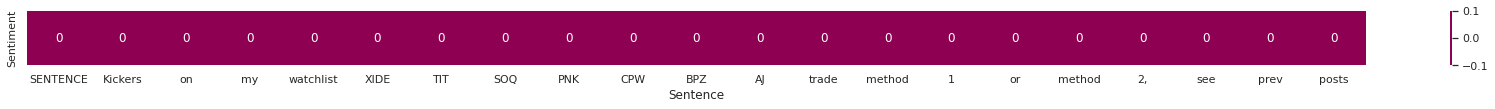

In [10]:
visualise_sentiments({
    "Sentence":["SENTENCE"] + sentence.split(),
    "Sentiment":[sid.polarity_scores(sentence)["compound"]] + [sid.polarity_scores(word)["compound"] for word in sentence.split()]
})

## TextBlob

In [11]:
from textblob import TextBlob

In [12]:
TextBlob(sentence).sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

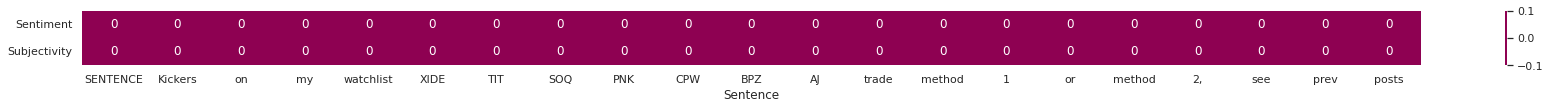

In [13]:
visualise_sentiments({
      "Sentence":["SENTENCE"] + sentence.split(),
      "Sentiment":[TextBlob(sentence).polarity] + [TextBlob(word).polarity for word in sentence.split()],
      "Subjectivity":[TextBlob(sentence).subjectivity] + [TextBlob(word).subjectivity for word in sentence.split()],
})

## Flair

In [14]:
!pip3 install flair
import flair
flair_sentiment = flair.models.TextClassifier.load('en-sentiment')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 401 kB 18.2 MB/s 
     |████████████████████████████████| 53 kB 1.7 MB/s 
     |████████████████████████████████| 19.7 MB 364 kB/s 
     |████████████████████████████████| 1.2 MB 54.2 MB/s 
     |████████████████████████████████| 1.6 MB 52.8 MB/s 
     |████████████████████████████████| 163 kB 52.4 MB/s 
     |████████████████████████████████| 788 kB 59.6 MB/s 
     |████████████████████████████████| 46 kB 3.6 MB/s 
     |████████████████████████████████| 5.3 MB 40.2 MB/s 
     |████████████████████████████████| 981 kB 39.7 MB/s 
     |████████████████████████████████| 200 kB 50.6 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 7.6 MB 49.3 MB/s 
  Created wheel for mpld3: filename=mpld3-0.3-py3-none-any.whl size=116702 sha256=36d777939eb648bdd91859669dd47512575c673e8745541adb06631727eeb5e4
  Stor

2022-10-17 13:38:07,648 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to /tmp/tmp5oxzmhf2


100%|██████████| 265512723/265512723 [00:20<00:00, 12757695.44B/s]

2022-10-17 13:38:29,119 copying /tmp/tmp5oxzmhf2 to cache at /root/.flair/models/sentiment-en-mix-distillbert_4.pt


2022-10-17 13:38:29,842 removing temp file /tmp/tmp5oxzmhf2
2022-10-17 13:38:29,877 loading file /root/.flair/models/sentiment-en-mix-distillbert_4.pt


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [15]:
s = flair.data.Sentence(sentence)
flair_sentiment.predict(s)
total_sentiment = s.labels
s.labels[0].value


'NEGATIVE'

In [16]:
total_sentiment[0].score

0.8865550756454468

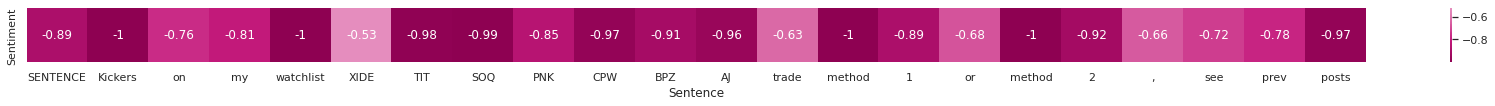

In [17]:
tokens = [token.text for token in s.tokens]
ss = [flair.data.Sentence(s) for s in tokens]
[flair_sentiment.predict(s) for s in ss]
sentiments = [s.labels[0].score * (-1,1)[str(s.labels[0]).split()[0].startswith("POS")] for s in ss]

visualise_sentiments({
      "Sentence":["SENTENCE"] + tokens,
      "Sentiment":[total_sentiment[0].score *(-1,1)[str(total_sentiment[0]).split()[0].startswith("POS")]] + sentiments,
})

## VADER

Same as NLTK Vader.

In [18]:
# !pip3 install vaderSentiment
# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [19]:
# def sentiment_vader(sent):

#     # Create a SentimentIntensityAnalyzer object.
#     sid_obj = SentimentIntensityAnalyzer()

#     # polarity_scores method of SentimentIntensityAnalyzer
#     # object gives a sentiment dictionary.
#     # which contains pos, neg, neu, and compound scores.
#     sentiment_dict = sid_obj.polarity_scores(sent)
#     negative = sentiment_dict['neg']
#     neutral = sentiment_dict['neu']
#     positive = sentiment_dict['pos']
#     compound = sentiment_dict['compound']

#     # print("Overall sentiment dictionary is : ", sentiment_dict)
#     # print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
#     # print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
#     # print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")
#     #
#     # print("Sentence Overall Rated As", end = " ")
#     #
#     # decide sentiment as positive, negative and neutral
#     if sentiment_dict['compound'] >= 0.05 :
#         overall_sentiment = "Positive"
#         # print("Positive")

#     elif sentiment_dict['compound'] <= - 0.05 :
#         overall_sentiment = "Negative"
#         # print("Negative")

#     else :
#         overall_sentiment = "Neutral"
#         # print("Neutral")
#     #
#     return negative, neutral, positive, compound, overall_sentiment

In [20]:
# sentiment_vader(sentence)

In [21]:
# !pip3 install torch==1.0.1 -f https://download.pytorch.org/whl/cpu/stable 
# !git clone https://github.com/huggingface/torchMoji
# import os
# os.chdir('torchMoji')
# !pip3 install -e .

type "yes" when prompted

In [22]:
# !python3 scripts/download_weights.py

In [23]:
# !python3 examples/text_emojize.py --text f" {sentence} "


In [24]:
# import numpy as np
# import emoji, json
# from torchmoji.global_variables import PRETRAINED_PATH, VOCAB_PATH
# from torchmoji.sentence_tokenizer import SentenceTokenizer
# from torchmoji.model_def import torchmoji_emojis
  
# EMOJIS = ":joy: :unamused: :weary: :sob: :heart_eyes: :pensive: :ok_hand: :blush: :heart: :smirk: :grin: :notes: :flushed: :100: :sleeping: :relieved: :relaxed: :raised_hands: :two_hearts: :expressionless: :sweat_smile: :pray: :confused: :kissing_heart: :heartbeat: :neutral_face: :information_desk_person: :disappointed: :see_no_evil: :tired_face: :v: :sunglasses: :rage: :thumbsup: :cry: :sleepy: :yum: :triumph: :hand: :mask: :clap: :eyes: :gun: :persevere: :smiling_imp: :sweat: :broken_heart: :yellow_heart: :musical_note: :speak_no_evil: :wink: :skull: :confounded: :smile: :stuck_out_tongue_winking_eye: :angry: :no_good: :muscle: :facepunch: :purple_heart: :sparkling_heart: :blue_heart: :grimacing: :sparkles:".split(' ')
# model = torchmoji_emojis(PRETRAINED_PATH)
# with open(VOCAB_PATH, 'r') as f:
#   vocabulary = json.load(f)
# st = SentenceTokenizer(vocabulary, 30)

# def deepmojify(sentence,top_n =5):
#   def top_elements(array, k):
#     ind = np.argpartition(array, -k)[-k:]
#     return ind[np.argsort(array[ind])][::-1]

#   tokenized, _, _ = st.tokenize_sentences([sentence])
#   prob = model(tokenized)[0]
#   emoji_ids = top_elements(prob, top_n)
#   emojis = map(lambda x: EMOJIS[x], emoji_ids)
#   return emoji.emojize(f"{sentence} {' '.join(emojis)}", use_aliases=True)

In [25]:
# deepmojify(sentence, top_n = 3)

## Text2Emotion

Not available due to emoji package updated. 

# Output

## NLTK Vader

In [26]:
output1 = []
for title in contents:
 
  output1.append(sid.polarity_scores(title)["compound"])
  
print(output1)

[0.0, 0.7034, 0.3612, 0.0, 0.0, 0.0, 0.0, 0.4084, 0.4019, 0.0, 0.4173, -0.4754, 0.7395, 0.3612, -0.296, 0.4824, 0.5719, 0.6705, 0.8805, 0.0, 0.4215, 0.0, 0.0, 0.0, 0.0, 0.5423, -0.2755, 0.0, 0.4404, -0.4215, 0.765, -0.2732, 0.4404, 0.0, 0.2732, 0.3612, 0.0772, -0.3802, -0.2808, 0.0, -0.1007, 0.0, 0.5719, 0.0, 0.0, 0.6808, -0.5719, 0.2023, 0.0, 0.0, 0.3182, -0.4215, 0.0, 0.0, -0.694, 0.0, 0.128, 0.0772, 0.0, -0.5719, 0.743, 0.0772, 0.6688, 0.0, -0.2732, -0.2732, 0.0, 0.0, -0.4215, 0.5267, 0.6369, 0.0, 0.0, 0.5859, 0.0, 0.4215, 0.0, 0.6204, 0.0, -0.128, 0.4404, 0.0, 0.0, -0.0258, 0.3818, 0.0, 0.8294, 0.5859, 0.0, 0.0, 0.0, 0.0, 0.3612, 0.0, 0.3182, 0.296, 0.296, 0.0, 0.0, 0.0, 0.296, 0.0, 0.0, 0.8856, -0.296, 0.5106, -0.765, 0.6116, 0.0, -0.067, 0.34, 0.0772, 0.0, -0.296, -0.3612, -0.2732, -0.2023, 0.4648, -0.4939, 0.0, 0.0, 0.0, -0.2732, 0.4466, 0.0, 0.0, 0.0, 0.1531, 0.4466, -0.128, 0.4404, 0.0, 0.0, 0.0, 0.0, 0.4601, 0.4215, 0.5904, 0.8455, -0.4215, 0.5904, -0.1779, -0.25, 0.0, 0.0, 0

## TextBlob


In [27]:
output2 = []
for title in contents:
 
  output2.append(TextBlob(title).sentiment.polarity)
  
print(output2)

[0.0, 1.0, -0.3, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.0, 0.13, 0.15, 0.7, 0.125, 0.0, 0.0, 0.3, 0.15000000000000002, 0.45555555555555555, 0.0, 0.6, 0.0, 0.0, 0.0, 0.390625, 0.5, -0.05, 0.0, 0.5166666666666666, 0.0, 1.0, 0.016666666666666666, 0.25, 0.0, 0.06666666666666665, 0.06666666666666667, 0.0, 0.17045454545454544, -0.0638888888888889, 0.0, 0.0, -0.0625, 0.0, 0.18333333333333335, 0.0, 0.35, 0.13636363636363635, 0.25, 0.08, 0.0, 0.375, 0.0, -0.15555555555555559, 0.0, 0.0, 0.0, 0.20555555555555557, 0.2, 0.0, -0.3, 0.7, 0.0, 0.9375, 0.0, 0.0, 0.0, 0.018181818181818174, -0.05, 0.0, 0.13333333333333333, 0.16, 0.0, 0.13636363636363635, 0.21666666666666667, 0.0, 0.6, 0.5, 0.3, 0.0, -0.0625, 0.475, -0.05, -0.05, -0.125, 0.012121212121212116, 0.25, 0.15, 0.16666666666666666, -0.03333333333333333, 0.0, -0.05, -0.025, 0.2, 0.0, 0.4000000000000001, 0.16666666666666669, 0.16666666666666669, -0.038888888888888896, 0.0, 0.0, 0.0, 0.0, 0.13636363636363635, 0.5528409090909091, 0.1, 0.06666666666666665, 

## Vader (*This model is same as previous one, we can ignore this!!!*)

In [28]:
# output = []
# for title in contents:
 
#   [negative, neutral, positive, compound, overall_sentiment] = sentiment_vader(title)
#   output.append(compound)
 
# print(output)

## Flair

In [29]:
output3 = []
for title in contents:
 
  s = flair.data.Sentence(title)
  flair_sentiment.predict(s)
  total_sentiment = s.labels
  output3.append(total_sentiment[0].value)
print(output3)



['NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'NE

# Evaluation

In [30]:
y_true = labels

# NLTK Vader
# Transfer the score into -1 or 1 label.
y_pred_vader = []
for n in output1:
    if n < 0:
        y_pred_vader.append(-1)
    else:
        y_pred_vader.append(1)

# TextBolb
# Transfer the score into -1 or 1 label.
y_pred_tb = []
for n in output2:
    if n < 0:
        y_pred_tb.append(-1)
    else:
        y_pred_tb.append(1)

# Flair
# Transfer neg or pos into -1 or 1 label.
y_pred_flair = []
for n in output3:
    if n == "NEGATIVE":
        y_pred_flair.append(-1)
    else:
        y_pred_flair.append(1)

print(y_true)
print(y_pred_tb)
print(y_pred_vader)
print(y_pred_flair)

[1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, -1, -1, -1, -1, -1, 1, -1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1,

In [31]:
from sklearn.metrics import classification_report

# Performance for NLTK Vader
print(classification_report(y_true, y_pred_vader))

              precision    recall  f1-score   support

          -1       0.56      0.35      0.43      2106
           1       0.69      0.84      0.76      3685

    accuracy                           0.66      5791
   macro avg       0.63      0.60      0.60      5791
weighted avg       0.65      0.66      0.64      5791



In [32]:
# Performance for TextBlob
print(classification_report(y_true, y_pred_tb))

              precision    recall  f1-score   support

          -1       0.47      0.24      0.32      2106
           1       0.66      0.85      0.74      3685

    accuracy                           0.63      5791
   macro avg       0.57      0.54      0.53      5791
weighted avg       0.59      0.63      0.59      5791



In [33]:
# Performance of Flair
print(classification_report(y_true, y_pred_flair))

              precision    recall  f1-score   support

          -1       0.46      0.78      0.58      2106
           1       0.79      0.48      0.59      3685

    accuracy                           0.59      5791
   macro avg       0.63      0.63      0.59      5791
weighted avg       0.67      0.59      0.59      5791



In [34]:
import random
random.sample(range(1,7),1)

[2]

#  Raw Data 

## NLTK


In [35]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Loading content information from raw data
BACcontents = BACdata['content'].tolist()
MSFTcontents = MSFTdata['content'].tolist()
NWSAcontents = NWSAdata['content'].tolist()



# BAC (NLTK Vader)
outputBAC = []
for BACcontent in BACcontents:
  outputBAC.append(sid.polarity_scores(str(BACcontent))["compound"])
print(outputBAC)

y_pred_BAC = []
for n in outputBAC:
    if n < 0:
        y_pred_BAC.append(-1)
    else:
        y_pred_BAC.append(1)
print(y_pred_BAC)



# MSFT (NLTK Vader)
outputMSFT = []
for MSFTcontent in MSFTcontents:
  outputMSFT.append(sid.polarity_scores(str(MSFTcontent))["compound"])
print(outputMSFT)

y_pred_MSFT = []
for n in outputMSFT:
    if n < 0:
        y_pred_MSFT.append(-1)
    else:
        y_pred_MSFT.append(1)
print(y_pred_MSFT)



# NWSA (NLTK Vader)
outputNWSA = []
for NWSAcontent in NWSAcontents:
  outputNWSA.append(sid.polarity_scores(str(NWSAcontent))["compound"])
print(outputNWSA)

y_pred_NWSA = []
for n in outputNWSA:
    if n < 0:
        y_pred_NWSA.append(-1)
    else:
        y_pred_NWSA.append(1)
print(y_pred_NWSA)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


[0.0094, 0.9934, 0.9991, 0.9997, 0.9806, 0.9994, 0.998, 0.9519, 0.9885, 0.0, 0.9941, 0.9977, 0.9984, 0.978, 0.9978, 0.992, 0.9914, -0.9262, 0.9996, 0.997, 0.9976, 0.9647, 0.9675, 0.9935, 0.9984, 0.9833, 0.9988, 0.99, 0.9897, 0.9987, 0.9928, 0.9951, 0.999, 0.997, 0.9894, 0.9822, 0.9705, 0.9972, 0.9617, 0.9978, 0.738, 0.9984, 0.9957, 0.9997, 0.9998, 0.996, 0.9666, 0.9998, 0.9955, 0.994, 0.9976, 0.9774, 0.9245, 0.9991, 0.9969, 0.9895, 0.9969, 0.9988, 0.9885, 0.994, 0.9941, 0.9382, 0.9927, 0.8919, 0.9951, -0.2732, -0.8072, 0.9984, -0.7741, 0.9823, 0.9992, 0.6189, 0.9996, 0.9712, 0.9983, 0.994, 0.9942, 0.9991, 0.9889, 0.9897, 0.9983, 0.9704, 0.9998, 0.9967, 0.9988, 0.9997, 0.9982, 0.9843, -0.9644, 0.9337, 0.9702, 0.994, 0.9359, 0.9957, 0.9979, 0.9919, 0.9996, 0.9973, 0.9995, 0.999, 0.9978, 0.9893, 0.9994, 0.9996, 0.9311, 0.9982, 0.8555, 0.9994, 0.9988, 0.9997, 0.9998, 0.9967, 0.9986, 0.9935, 0.9993, 0.9994, 0.9983, 0.9983, 0.9779, 0.9779, 0.9957, 0.9997, 0.9995, 0.9992, 0.9564, -0.81, 0.988

In [36]:
BACdata['Sentiment_Score'] = outputBAC
BACdata['Pos_Neg'] = y_pred_BAC

In [37]:
BACdata.head()

,Unnamed: 0,id,ticker,title,category,content,release_date,provider,url,article_id,Sentiment_Score,Pos_Neg
0,41710,263225,BAC,U S Investors Go All In On Equity ETFs,opinion,At the end of last week analysts at Bank of A...,2016-12-20,Rupert Hargreaves,https://www.investing.com/analysis/u.s.-invest...,200170359,0.0094,1
1,41711,263226,BAC,It s The Big Banks Time To Shine,opinion,A couple of days after Donald Trump was electe...,2016-12-23,Kenneth Ashe,https://www.investing.com/analysis/it's-the-bi...,200170694,0.9934,1
2,41712,263227,BAC,7 Reasons To Invest In Bank Of America Heading...,opinion,There are a few times in the life of an invest...,2016-12-29,Kenneth Ashe,https://www.investing.com/analysis/seven-reaso...,200171060,0.9991,1
3,41713,263228,BAC,Outlook 2017 Part II Stocks Bonds Inflatio...,opinion,Without question 2016 was the year of the big...,2016-12-30,Investing.com,https://www.investing.com/analysis/outlook-201...,200170791,0.9997,1
4,41714,263229,BAC,Financial Crash Fallout Continues U S Sues B...,opinion,If you saw your Barclays LON BARC stock take...,2017-01-01,Modest Money,https://www.investing.com/analysis/financial-c...,200171173,0.9806,1


In [38]:
MSFTdata['Sentiment_Score'] = outputMSFT
MSFTdata['Pos_Neg'] = y_pred_MSFT

In [39]:
MSFTdata.head()

,Unnamed: 0,id,ticker,title,category,content,release_date,provider,url,article_id,Sentiment_Score,Pos_Neg
0,31542,253057,MSFT,U S intel expert says Russians weaponized e...,news,Investing com The rhetorical war between th...,2017-01-01,Investing.com,https://www.investing.com/news/world-news/u.s....,450653,-0.8709,-1
1,31601,253116,MSFT,Orlando nightclub victims families sue Twitte...,news,By Brendan O Brien Reuters The families of...,2016-12-21,Reuters,https://www.investing.com/news/stock-market-ne...,448977,-0.9931,-1
2,31602,253117,MSFT,Nokia sues Apple for infringing patents indus...,news,By Eric Auchard and Jussi Rosendahl BELGRADE H...,2016-12-21,Reuters,https://www.investing.com/news/technology-news...,449254,-0.6808,-1
3,31603,253118,MSFT,Yahoo email scan shows U S spy push to recast...,news,By Joseph Menn Reuters Yahoo NASDAQ YHOO ...,2016-12-21,Reuters,https://www.investing.com/news/technology-news...,449318,0.9984,1
4,31604,253119,MSFT,Chinese investors buy stake in mapping firm HERE,news,FRANKFURT Reuters Two Chinese companies an...,2016-12-27,Reuters,https://www.investing.com/news/technology-news...,450003,0.9847,1


In [40]:
NWSAdata['Sentiment_Score'] = outputNWSA
NWSAdata['Pos_Neg'] = y_pred_NWSA

In [41]:
NWSAdata.head()

,Unnamed: 0,id,ticker,title,category,content,release_date,provider,url,article_id,Sentiment_Score,Pos_Neg
0,150464,371980,NWSA,Gibraltar Industries Eaton News Scripps Net...,opinion,For Immediate Release\n\n\tChicago IL Novem...,2016-11-06,Zacks Investment Research,https://www.investing.com/analysis/gibraltar-i...,200163145,0.9994,1
1,150465,371981,NWSA,Stock Market News For November 08 2016,opinion,Benchmarks ended higher on Monday after the FB...,2016-11-07,Zacks Investment Research,https://www.investing.com/analysis/stock-marke...,200163490,0.9971,1
2,150493,372009,NWSA,News Corp NWSA Q4 Earnings Will The Stock ...,opinion,News Corporation NASDAQ NWSA the diversif...,2016-08-02,Zacks Investment Research,https://www.investing.com/analysis/news-corp.-...,200145658,0.9595,1
3,150494,372010,NWSA,A Look At Media Stocks Earnings Slated For Aug...,opinion,We have now left the bulk of the Q2 earnings s...,2016-08-05,Zacks Investment Research,https://www.investing.com/analysis/a-look-at-m...,200146313,0.9846,1
4,150495,372011,NWSA,Swing Trading Watch List PEP PNR HUN NWS WTW,opinion,Here s your swing trading watch list \nLong Pe...,2016-08-07,Ryan Mallory,https://www.investing.com/analysis/swing-tradi...,200146479,0.0000,1


# Average Score


In [42]:
# BACdata

# Remove useless columns
BACdata_clean = BACdata[['release_date', 'Sentiment_Score', 'Pos_Neg']]
BACdata_clean

,release_date,Sentiment_Score,Pos_Neg
0,2016-12-20,0.0094,1
1,2016-12-23,0.9934,1
2,2016-12-29,0.9991,1
3,2016-12-30,0.9997,1
4,2017-01-01,0.9806,1
...,...,...,...
3147,2010-01-31,0.7906,1
3148,2010-05-10,-0.3668,-1
3149,2010-05-27,-0.5955,-1
3150,2010-07-06,0.9749,1


In [43]:
# Sort the dataframe by date
BACdata_clean = BACdata_clean.sort_values(by="release_date")
BACdata_clean

,release_date,Sentiment_Score,Pos_Neg
3147,2010-01-31,0.7906,1
3148,2010-05-10,-0.3668,-1
3149,2010-05-27,-0.5955,-1
3150,2010-07-06,0.9749,1
3151,2010-07-14,0.9300,1
...,...,...,...
1049,2016-12-26,-0.9327,-1
2,2016-12-29,0.9991,1
1050,2016-12-30,0.9970,1
3,2016-12-30,0.9997,1


In [44]:
# Take the average of sentiment score for those rows with same date. 
BACdata_clean = BACdata_clean.groupby('release_date').mean().reset_index()
BACdata_clean

,release_date,Sentiment_Score,Pos_Neg
0,2010-01-31,0.790600,1.0
1,2010-05-10,-0.366800,-1.0
2,2010-05-27,-0.595500,-1.0
3,2010-07-06,0.974900,1.0
4,2010-07-14,0.930000,1.0
...,...,...,...
1301,2016-12-23,0.508325,0.5
1302,2016-12-26,-0.932700,-1.0
1303,2016-12-29,0.999100,1.0
1304,2016-12-30,0.998350,1.0


In [45]:
# Same action for MSFTdata

# Remove useless columns
MSFTdata_clean = MSFTdata[['release_date', 'Sentiment_Score', 'Pos_Neg']]

# Sort the dataframe by date
MSFTdata_clean = MSFTdata_clean.sort_values(by="release_date")

# Take the average of sentiment score for those rows with same date. 
MSFTdata_clean = MSFTdata_clean.groupby('release_date').mean().reset_index()
MSFTdata_clean

,release_date,Sentiment_Score,Pos_Neg
0,2010-01-24,0.978100,1.000000
1,2011-03-30,0.944400,1.000000
2,2011-03-31,0.089920,0.200000
3,2011-04-04,0.965200,1.000000
4,2011-04-05,0.700267,0.666667
...,...,...,...
809,2016-12-21,-0.225167,-0.333333
810,2016-12-27,0.970600,1.000000
811,2016-12-29,0.992000,1.000000
812,2016-12-30,0.990800,1.000000


In [46]:
# Same action for NWSAdata

# Remove useless columns
NWSAdata_clean = NWSAdata[['release_date', 'Sentiment_Score', 'Pos_Neg']]

# Sort the dataframe by date
NWSAdata_clean = NWSAdata_clean.sort_values(by="release_date")

# Take the average of sentiment score for those rows with same date. 
NWSAdata_clean = NWSAdata_clean.groupby('release_date').mean().reset_index()
NWSAdata_clean

,release_date,Sentiment_Score,Pos_Neg
0,2011-07-11,-0.99330,-1.0
1,2011-07-18,0.99410,1.0
2,2011-08-11,0.87035,1.0
3,2012-01-23,0.95650,1.0
4,2012-02-29,0.83360,1.0
...,...,...,...
346,2016-11-01,0.78410,1.0
347,2016-11-03,0.99420,1.0
348,2016-11-06,0.99940,1.0
349,2016-11-07,0.99710,1.0


# Concatenation

In [47]:
cleaned_all_data


,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK,open,close,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",0,66740,140.000000,140.250000,...,1.273300e+10,7498000000,1.750200e+10,1.604800e+10,3.355000e+10,3.087100e+10,-1.538500e+10,2013.0,6.83,682137628.1
1,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",0,66740,138.050003,138.130005,...,1.273300e+10,7498000000,1.750200e+10,1.604800e+10,3.355000e+10,3.087100e+10,-1.538500e+10,2013.0,6.83,682137628.1
2,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",0,66740,138.369995,138.449997,...,1.273300e+10,7498000000,1.750200e+10,1.604800e+10,3.355000e+10,3.087100e+10,-1.538500e+10,2013.0,6.83,682137628.1
3,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",0,66740,138.750000,137.630005,...,1.273300e+10,7498000000,1.750200e+10,1.604800e+10,3.355000e+10,3.087100e+10,-1.538500e+10,2013.0,6.83,682137628.1
4,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",0,66740,137.449997,137.649994,...,1.273300e+10,7498000000,1.750200e+10,1.604800e+10,3.355000e+10,3.087100e+10,-1.538500e+10,2013.0,6.83,682137628.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408637,ZTS,Zoetis,reports,Health Care,Pharmaceuticals,"Florham Park, New Jersey",2013-06-21,1555280,53.200001,53.779999,...,3.830000e+09,1781000000,1.068000e+09,6.845000e+09,7.913000e+09,4.765000e+09,-2.030000e+08,2015.0,0.68,498529411.8
408638,ZTS,Zoetis,reports,Health Care,Pharmaceuticals,"Florham Park, New Jersey",2013-06-21,1555280,53.779999,53.720001,...,3.830000e+09,1781000000,1.068000e+09,6.845000e+09,7.913000e+09,4.765000e+09,-2.030000e+08,2015.0,0.68,498529411.8
408639,ZTS,Zoetis,reports,Health Care,Pharmaceuticals,"Florham Park, New Jersey",2013-06-21,1555280,53.759998,53.439999,...,3.830000e+09,1781000000,1.068000e+09,6.845000e+09,7.913000e+09,4.765000e+09,-2.030000e+08,2015.0,0.68,498529411.8
408640,ZTS,Zoetis,reports,Health Care,Pharmaceuticals,"Florham Park, New Jersey",2013-06-21,1555280,53.470001,53.619999,...,3.830000e+09,1781000000,1.068000e+09,6.845000e+09,7.913000e+09,4.765000e+09,-2.030000e+08,2015.0,0.68,498529411.8


In [48]:
# Join the sentiment data set with the price data set. 
# BAC
BAC_sentiment = BACdata_clean.rename(columns={'release_date': 'todate'})
BAC_sentiment.set_index('todate', inplace = True)

cleaned_all_data_BAC = cleaned_all_data[cleaned_all_data['Ticker symbol'] == 'BAC']
cleaned_all_data_BAC.set_index('todate', inplace = True)

BAC_final = cleaned_all_data_BAC.join(BAC_sentiment, how='left').fillna(0)

BAC_final.head()

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK,open,close,...,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding,Sentiment_Score,Pos_Neg
todate,,,,,,,,,,,,,,,,,,,,,
2012-12-31,BAC,Bank of America Corp,reports,Financials,Banks,"Charlotte, North Carolina",1976-06-30,70858,11.37,11.61,...,2.370000e+11,1.970000e+12,2.210000e+12,1.000000e+11,0.0,2012.0,0.26,1.610769e+10,-0.971000,-1.000000
2013-01-02,BAC,Bank of America Corp,reports,Financials,Banks,"Charlotte, North Carolina",1976-06-30,70858,12.05,12.03,...,2.370000e+11,1.970000e+12,2.210000e+12,1.000000e+11,0.0,2012.0,0.26,1.610769e+10,0.692533,1.000000
2013-01-03,BAC,Bank of America Corp,reports,Financials,Banks,"Charlotte, North Carolina",1976-06-30,70858,12.01,11.96,...,2.370000e+11,1.970000e+12,2.210000e+12,1.000000e+11,0.0,2012.0,0.26,1.610769e+10,0.000000,0.000000
2013-01-04,BAC,Bank of America Corp,reports,Financials,Banks,"Charlotte, North Carolina",1976-06-30,70858,11.97,12.11,...,2.370000e+11,1.970000e+12,2.210000e+12,1.000000e+11,0.0,2012.0,0.26,1.610769e+10,0.000000,0.000000
2013-01-07,BAC,Bank of America Corp,reports,Financials,Banks,"Charlotte, North Carolina",1976-06-30,70858,12.15,12.09,...,2.370000e+11,1.970000e+12,2.210000e+12,1.000000e+11,0.0,2012.0,0.26,1.610769e+10,0.341367,0.333333


In [49]:
# NWSA

NWSA_sentiment = NWSAdata_clean.rename(columns={'release_date': 'todate'})
NWSA_sentiment.set_index('todate', inplace = True)

cleaned_all_data_NWSA = cleaned_all_data[cleaned_all_data['Ticker symbol'] == 'NWSA']
cleaned_all_data_NWSA.set_index('todate', inplace = True)

NWSA_final = cleaned_all_data_NWSA.join(NWSA_sentiment, how='left').fillna(0)
NWSA_final.head()

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK,open,close,...,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding,Sentiment_Score,Pos_Neg
todate,,,,,,,,,,,,,,,,,,,,,
2013-07-01,NWSA,News Corp. Class A,reports,Consumer Discretionary,Publishing,"New York, New York",2013-08-01,1564708,14.79,14.79,...,1.255800e+10,3.065000e+09,1.562300e+10,8.891000e+09,0.0,0.0,0.0,0.0,0.576948,0.523810
2013-07-02,NWSA,News Corp. Class A,reports,Consumer Discretionary,Publishing,"New York, New York",2013-08-01,1564708,14.69,15.00,...,1.255800e+10,3.065000e+09,1.562300e+10,8.891000e+09,0.0,0.0,0.0,0.0,0.661341,0.743590
2013-07-03,NWSA,News Corp. Class A,reports,Consumer Discretionary,Publishing,"New York, New York",2013-08-01,1564708,14.95,14.87,...,1.255800e+10,3.065000e+09,1.562300e+10,8.891000e+09,0.0,0.0,0.0,0.0,0.309503,0.388889
2013-07-05,NWSA,News Corp. Class A,reports,Consumer Discretionary,Publishing,"New York, New York",2013-08-01,1564708,14.95,15.66,...,1.255800e+10,3.065000e+09,1.562300e+10,8.891000e+09,0.0,0.0,0.0,0.0,0.564861,0.555556
2013-07-08,NWSA,News Corp. Class A,reports,Consumer Discretionary,Publishing,"New York, New York",2013-08-01,1564708,15.63,15.96,...,1.255800e+10,3.065000e+09,1.562300e+10,8.891000e+09,0.0,0.0,0.0,0.0,0.554179,0.578947


In [58]:
# 1700 rows BAC data
# BAC_1700_rows

BAC_sentiment = BACdata_clean.rename(columns={'release_date': 'date'})
BAC_sentiment.set_index('date', inplace = True)

# cleaned_all_data_BAC = cleaned_all_data[cleaned_all_data['Ticker symbol'] == 'BAC']
# BAC_1700_rows.set_index('date', inplace = True)

BAC_1700_final = BAC_1700_rows.join(BAC_sentiment, how='left').fillna(0)

BAC_1700_final

,open,close,low,high,volume,Sentiment_Score,Pos_Neg
date,,,,,,,
2010-01-04,15.240000,15.690000,15.120000,15.750000,180845200.0,0.000000,0.0
2010-01-05,15.740000,16.200001,15.700000,16.209999,209521300.0,0.000000,0.0
2010-01-06,16.209999,16.389999,16.030001,16.540001,205257900.0,0.000000,0.0
2010-01-07,16.680000,16.930000,16.510000,17.190001,320868400.0,0.000000,0.0
2010-01-08,16.980000,16.780001,16.629999,17.100000,220104700.0,0.000000,0.0
...,...,...,...,...,...,...,...
2016-12-23,22.510000,22.600000,22.430000,22.650000,38093700.0,0.508325,0.5
2016-12-27,22.709999,22.610001,22.540001,22.740000,39891000.0,0.000000,0.0
2016-12-28,22.620001,22.330000,22.260000,22.670000,52141300.0,0.000000,0.0


In [50]:
# # Upload the datasets to the google drive
# from google.colab import drive
# drive.mount('drive')
# BAC_final.to_csv('BAC_with_sentiment.csv')
# !cp BAC_with_sentiment.csv "drive/My Drive"

In [51]:
# # Upload the datasets to the google drive
# from google.colab import drive
# drive.mount('drive')
# NWSA_final.to_csv('NWSA_with_sentiment.csv')
# !cp NWSA_with_sentiment.csv "drive/My Drive"

In [59]:
# # Upload the datasets to the google drive
# from google.colab import drive
# drive.mount('drive')
# BAC_1700_final.to_csv('BAC_with_sentiment_1762_rows.csv')
# !cp BAC_with_sentiment_1762_rows.csv "drive/My Drive"

Mounted at drive
